In [1]:
import rf_lists
import math
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
samples = 300
X = list(np.linspace(0, 20*np.pi, num=samples))
y_sine = [math.sin(x) for x in X]
y_line = [1*x + 30 for x in X]
noise_sine = list(np.random.normal(0,0.3,samples))
noise_line = list(np.random.normal(0,1,samples))
y_sine_noisy = [sum(x) for x in zip(y_sine, noise_sine)]
y_line_noisy = [sum(x) for x in zip(y_line, noise_line)]
data_sine = np.hstack((np.array(X).reshape(samples,1),np.array(y_sine).reshape(samples,1)))
data_sine_noisy = np.hstack((np.array(X).reshape(samples,1),np.array(y_sine_noisy).reshape(samples,1)))
data_line = np.hstack((np.array(X).reshape(samples,1),np.array(y_line).reshape(samples,1)))
data_line_noisy = np.hstack((np.array(X).reshape(samples,1),np.array(y_line_noisy).reshape(samples,1)))

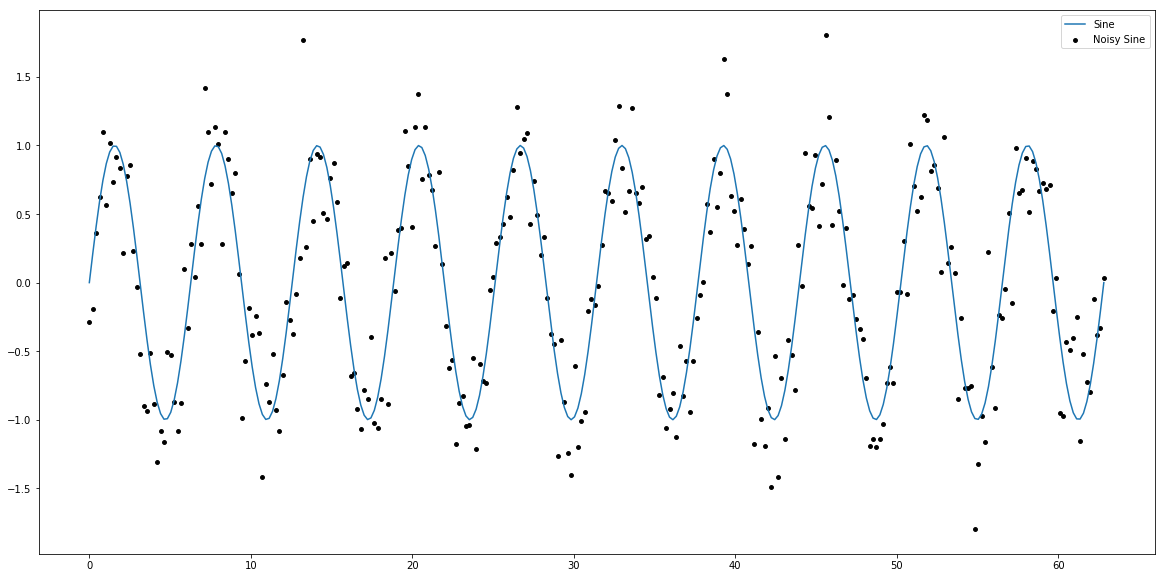

In [3]:
plt.figure(figsize=(20,10))
plt.scatter(X, y_sine_noisy, s = 15, color = 'black', label="Noisy Sine")
plt.plot(X, y_sine, label="Sine")
plt.legend()
plt.show()

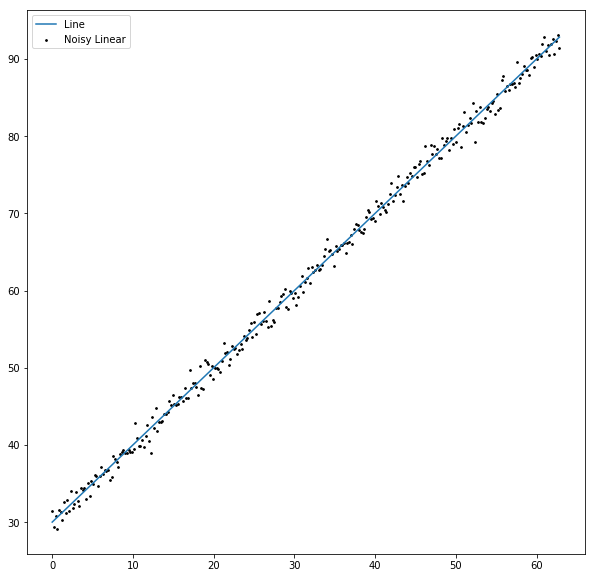

In [4]:
plt.figure(figsize=(10,10))
plt.scatter(X, y_line_noisy, s = 3, color = 'black', label="Noisy Linear")
plt.plot(X, y_line, label="Line")
plt.legend()
plt.show()

In [5]:
data_sine_list = [list(i) for i in list(data_sine)]
data_sine_noisy_list = [list(i) for i in list(data_sine_noisy)]
data_line_list = [list(i) for i in list(data_line)]
data_line_noisy_list = [list(i) for i in list(data_line_noisy)]

In [6]:
n_folds = 5
max_depth = 100
min_size = 1
sample_size = 1.0
n_features = 1

In [ ]:
scores, pred_sine, test = rf_lists.evaluate_algorithm_regression(data_sine_list, rf_lists.random_forest_regression, n_folds, max_depth, min_size, sample_size, 1, n_features)

In [7]:
print("SINE TESTS")
print("")
print("Noiseless Test Sine")
for n_trees in [100]:
    scores, pred_sine, test_sine = rf_lists.evaluate_algorithm_regression(data_sine_list, rf_lists.random_forest_regression, n_folds, max_depth, min_size, sample_size, n_trees, n_features)
    print('Trees: %d' % n_trees)
    print('Scores: %s' % scores)
    print('Mean Squared Error: %.3f' % (sum(scores)/float(len(scores))))
print("")
print("Adding Noise Test Sine")
for n_trees in [100]:
    scores, pred_noise_sine, test_noise_sine = rf_lists.evaluate_algorithm_regression(data_sine_noisy_list, rf_lists.random_forest_regression, n_folds, max_depth, min_size, sample_size, n_trees, n_features)
    print('Trees: %d' % n_trees)
    print('Scores: %s' % scores)
    print('Mean Squared Error: %.3f' % (sum(scores)/float(len(scores))))
print("")
print("")
print("LINEAR TESTS")
print("")
print("Noiseless Test Linear")
for n_trees in [100]:
    scores, pred_line, test_line = rf_lists.evaluate_algorithm_regression(data_line_list, rf_lists.random_forest_regression, n_folds, max_depth, min_size, sample_size, n_trees, n_features)
    print('Trees: %d' % n_trees)
    print('Scores: %s' % scores)
    print('Mean Squared Error: %.3f' % (sum(scores)/float(len(scores))))
print("")
print("Adding Noise Test Linear")
for n_trees in [100]:
    scores, pred_noise_line, test_noise_line = rf_lists.evaluate_algorithm_regression(data_line_noisy_list, rf_lists.random_forest_regression, n_folds, max_depth, min_size, sample_size, n_trees, n_features)
    print('Trees: %d' % n_trees)
    print('Scores: %s' % scores)
    print('Mean Squared Error: %.3f' % (sum(scores)/float(len(scores))))

SINE TESTS

Noiseless Test Sine
Trees: 100
Scores: [0.05667665329314988, 0.025492804787563522, 0.0598905294523813, 0.030034607390307323, 0.030911355667927805]
Mean Squared Error: 0.041

Adding Noise Test Sine
Trees: 100
Scores: [0.26121240230723364, 0.22692465510452084, 0.27418703172283027, 0.21541728344189665, 0.26297434080366344]
Mean Squared Error: 0.248


LINEAR TESTS

Noiseless Test Linear
Trees: 100
Scores: [0.07433399660033779, 0.07212605610725914, 0.07359801643597892, 0.07801389742213649, 0.11260496514704703]
Mean Squared Error: 0.082

Adding Noise Test Linear
Trees: 100
Scores: [1.9053681271894567, 2.0186737649500146, 2.2632812656291184, 3.0131932028985027, 1.7994111652804157]
Mean Squared Error: 2.200


In [16]:
pred = [pred_noise_sine, pred_noise_line]
test = [test_noise_sine, test_noise_line]
labels = ["Sine", "Linear"]

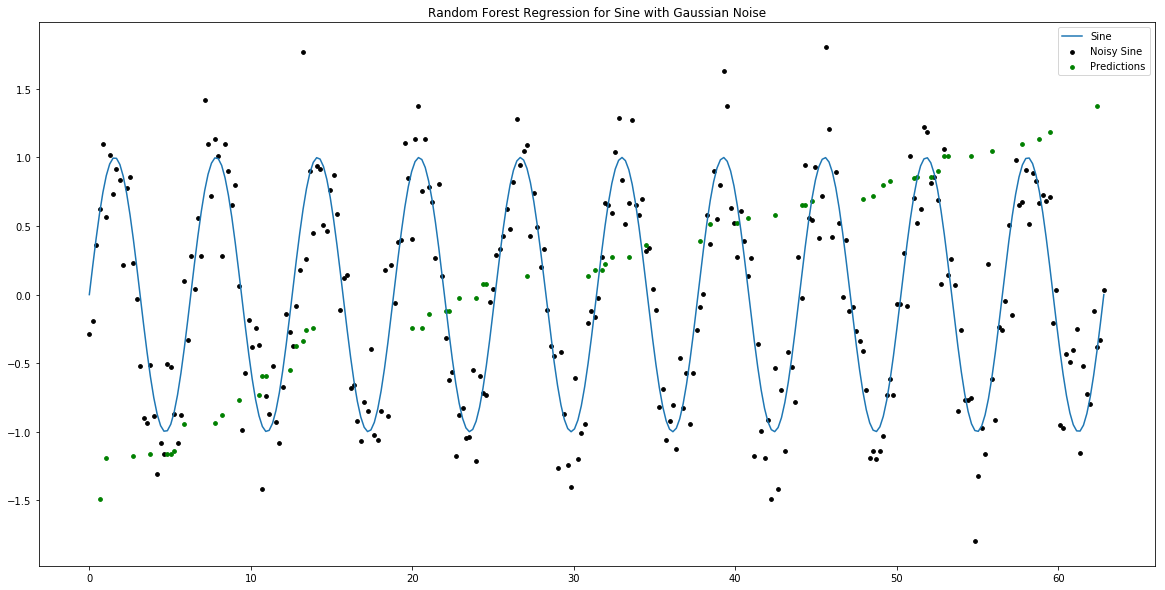

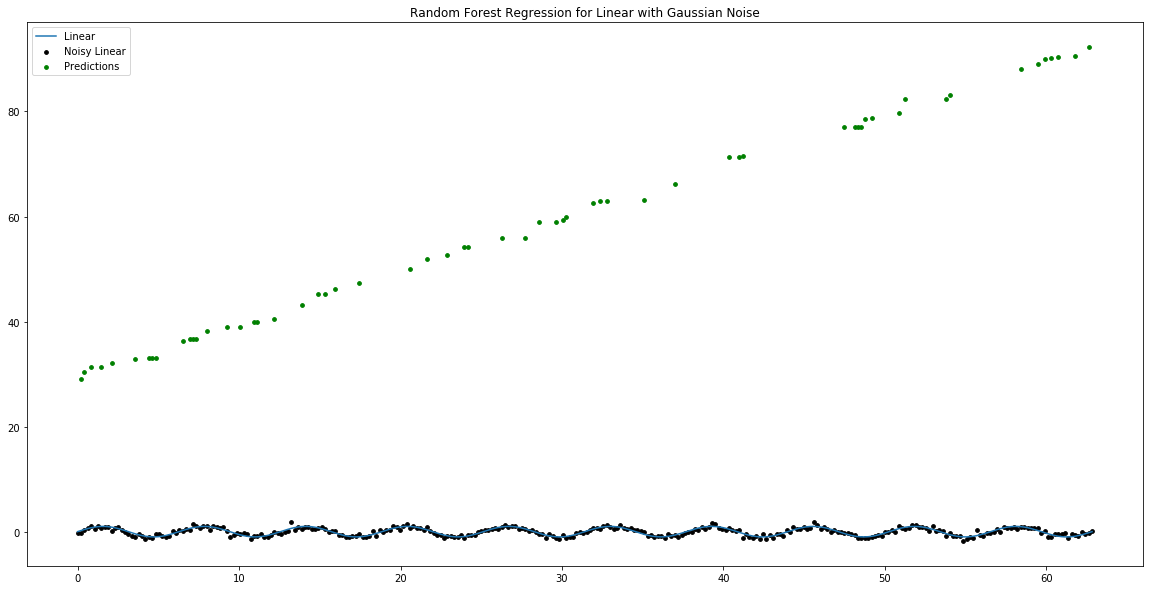

In [17]:
for i in range(len(pred)):
    test_new = [j[0] for j in test[i]]
    data_test = np.hstack((np.array(test_new).reshape(-1,1),np.array(pred[i]).reshape(-1,1)))
    data_test.sort(axis = 0)
    plt.figure(figsize=(20,10))
    plt.scatter(X, y_sine_noisy, s = 14, color = 'black', label="Noisy " + labels[i])
    plt.plot(X, y_sine, label=labels[i])
    plt.scatter(data_test[:,0], data_test[:,1],s = 14, color='green', label = 'Predictions')
    plt.legend()
    plt.title("Random Forest Regression for " + labels[i] + " with Gaussian Noise")
    plt.show()